In [1]:
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout
from community import community_louvain

import codecs
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
path = '/dataset/SNA_final/'
n = 'Three_Kingdoms_node.txt'
e = 'Three_Kingdoms_edge.txt'

G=nx.Graph()

In [3]:
with codecs.open(path+e, "r", "utf8") as f:
    for line in f.readlines()[1:]:
        col=line.split() 
        G.add_edge(col[0],col[1],weight=float(col[2]))

In [4]:
all_weights = []

# Iterate through the graph nodes to gather all the weights
for (node1,node2,data) in G.edges(data=True):
    all_weights.append(data['weight'])

In [5]:
# Get unique weigh
unique_weights = list(set(all_weights))

In [6]:
# compute the degree
d = nx.degree(G)
dict_d = dict(d)

In [7]:
# compute communities
partition = community_louvain.best_partition(G)

In [8]:
# Let dict_d and partition in the same order for node color 
partition_to_order = []
for i in dict_d.keys():
    partition_to_order.append(partition[i])

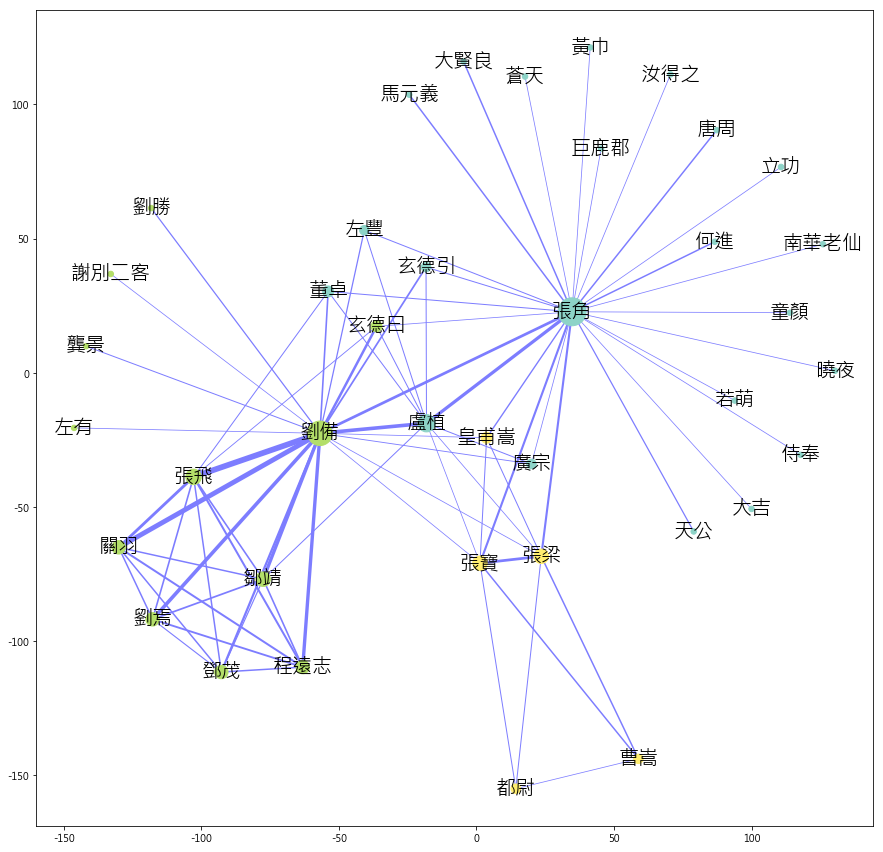

In [12]:
plt.figure(figsize=(15,15))

# compute graph layout
pos = graphviz_layout(G)
# compute the node size
n_size = [v * 30 for v in dict_d.values()]

# Plot the edges - one by one
for weight in unique_weights:
    # Form a filtered list with just the weight want to draw
    weighted_edges = [(node1,node2) for (node1,node2,edge_attr) in G.edges(data=True) if edge_attr['weight']==weight]
    # multiplying by [num_nodes/sum(all_weights)] makes the graphs edges look cleaner
    width = weight*len(dict_d.keys())*3.0/sum(all_weights)
    
    nx.draw_networkx_edges(G, pos, edgelist=weighted_edges, width=width, edge_color='#7d7dff')

    
nx.draw_networkx_nodes(G,pos,nodelist=dict_d.keys(), node_size=n_size, with_labels=True
        , prog='dot', cmap=plt.get_cmap('Set3'), node_color=partition_to_order)

nx.draw_networkx_labels(G, pos, font_size=20)
# nx.draw(G,pos,nodelist=dict_d.keys(), node_size=[v * 15 for v in dict_d.values()], with_labels=True
#         , font_size=20, prog='dot')

plt.savefig("Graph.png", format="PNG")